In [1]:
# 필요한 라이브러리를 import 하기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# csv 파일을 DataFrame으로 읽어오기
df = pd.read_csv('trip.csv')

In [3]:
df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [4]:
# column별 row의 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
# dataframe의 통계적 자료 확인
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [6]:
# 완전히 중복된 값 검색
df[df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [7]:
# 중복값 제거
df = df.drop_duplicates()
df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [8]:
# passenger_name은 결과값에 영향을 미치지 않을 것으로 판단되어 column 삭제
df.drop('passenger_name', axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [10]:
# null값의 개수 확인
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [11]:
# fare_amount의 데이터에 null 값 3건 확인
df[df['fare_amount'].isna()]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [12]:
# fare_amount null값의 비율 확인. 0.01%로 삭제해도 될 것으로 판단
df.isna().mean()

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [13]:
# fare_amount의 값이 null인 데이터 삭제
df = df.dropna(subset=['fare_amount'])

In [14]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [15]:
# 데이터의 이상치 판단을 위해 describe 메서드 사용
df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643638,2.912231,13.023681,1.835363,0.312329
std,1.305027,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [16]:
# passenger_count의 최댓값이 36
# 오름차순 정리하여 null값 확인
# 1건 있는 것으로 확인됨. 잘못된 값으로 추정
df['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='trip_distance'>

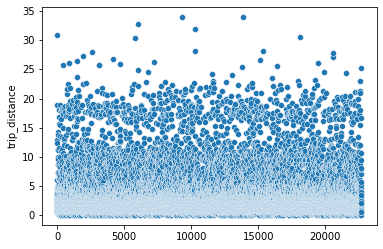

In [17]:
# trip_distance 중 큰 값은 택시 타고 먼 거리를 이동한 것으로 가정
# 0인 값들 중 이상값들이 있을 것 같아 확인 필요
sns.scatterplot(x=df.index, y=df['trip_distance'])

<AxesSubplot:ylabel='fare_amount'>

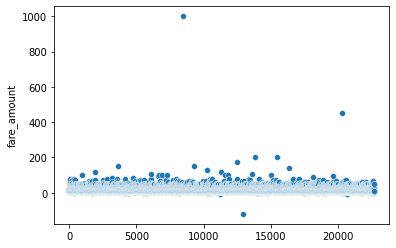

In [18]:
# fare_amount에는 이상치들이 보이는 것 같음
# 1000불에 가까운 fare_amount나 0 이하의 fare_amount 값이 존재
# 택시를 운행하다 손님에게 피해를 보상하거나 하는 식으로 해석이 가능해 보이지만,
# 데이터를 활용할 때 그런 경우가 고려되는 것이 비정상적일 것으로 판단
# 거리별, 시간별 택시 요금을 예측하는 경우에 fare가 0보다 큰 경우가 일반적일 것이므로 자세한 값은 확인이 필요할 듯
sns.scatterplot(x=df.index, y=df['fare_amount'])

<AxesSubplot:ylabel='tip_amount'>

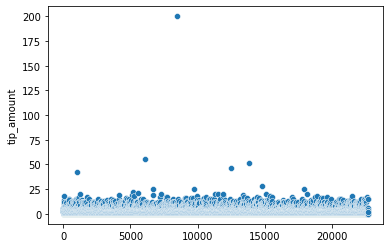

In [19]:
# 거리에 따라 tip이 증가하는 경우가 있으나
# 맨 위의 200불은 이상치로 판단됨
sns.scatterplot(x=df.index, y=df['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

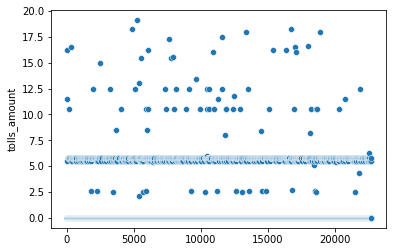

In [20]:
# toll 값은 정상적인 분포로 판단됨
sns.scatterplot(x=df.index, y=df['tolls_amount'])

In [21]:
# fare_amount 값이 300보다 큰 값 조회
df[df['fare_amount'] > 300]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0
20314,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.0,450.00,0.0,0.0


In [22]:
# fare_amount 값이 0보다 작은 값 조회
# 데이터 개수가 많은 것 같지만 전체 비율은 생각보다 크지 않고,
# 0이라는 값이 데이터 전반에 미치는 영향을 고려할 때 삭제하는 편이 나을 것으로 판단됨
df[df['fare_amount'] < 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4425,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
10283,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,Credit Card,2,0.00,-2.5,0.0,0.0
11206,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [23]:
# fare_amount가 0보다 작은 값 삭제
df = df[df['fare_amount'] >= 0]

In [24]:
# fare_amount가 300보다 큰 값 삭제
df = df[df['fare_amount'] < 300]

In [25]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [26]:
# tip_amount가 100보다 큰 값 삭제
# 위에서 이미 삭제되어 row 수에는 차이가 없음
df = df[df['tip_amount'] < 100]

In [27]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<AxesSubplot:ylabel='passenger_count'>

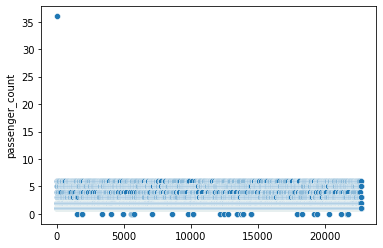

In [28]:
# passenger_count 컬럼의 값 중 이상치는 35보다 큰 값과 0인 값이 있음
# 개별 값들을 어떻게 처리할지 생각해봐야 함
# 최댓값으로 확인 가능했던 36의 데이터는 삭제하는 것이 나을 것 같음
sns.scatterplot(x=df.index, y=df['passenger_count'])

In [176]:
# passenger_count가 0인 값을 조회
# 데이터를 보면, trip_distance와 fare들의 특성이 정상적인 것을 살펴볼 수 있음
# 단순히 데이터 수집에서 놓친 것으로 가정해볼 수 있음
# 중간값으로 값을 대체
df[df['passenger_count'] == 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [29]:
df = df[df['passenger_count'] < 30]

<AxesSubplot:ylabel='passenger_count'>

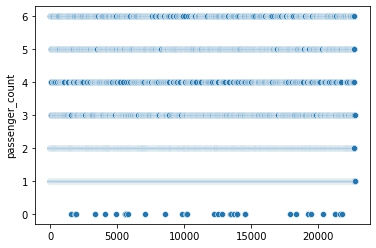

In [31]:
sns.scatterplot(x=df.index, y=df['passenger_count'])

In [38]:
# passenger_count가 0인 값을 중간값으로 변경
df['passenger_count'].replace({0: df['passenger_count'].median()}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [39]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6.0,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1.0,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1.0,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1.0,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1.0,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3.0,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1.0,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1.0,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1.0,2.36,10.5,1.70,0.00


In [40]:
# trip_distance가 0인 값 확인
df[df['trip_distance'] == 0]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1.0,0.0,20.0,0.00,0.0
248,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1.0,0.0,2.5,0.00,0.0
293,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1.0,0.0,2.5,0.00,0.0
321,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1.0,0.0,2.5,0.00,0.0
426,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1.0,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...
22192,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1.0,0.0,2.5,0.00,0.0
22327,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1.0,0.0,16.8,3.42,0.0
22385,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1.0,0.0,10.0,0.00,0.0
22568,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1.0,0.0,0.0,0.00,0.0


In [41]:
df[(df['trip_distance']==0) & (df['fare_amount'] > 2.5)]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1.0,0.0,20.0,0.00,0.00
472,12/07/2017 2:39:18 PM,12/07/2017 2:39:23 PM,Debit Card,1.0,0.0,34.0,6.96,0.00
474,06/20/2017 6:57:39 PM,06/20/2017 6:57:39 PM,Debit Card,1.0,0.0,9.5,0.00,0.00
574,07/18/2017 1:29:06 PM,07/18/2017 1:29:19 PM,Cash,1.0,0.0,52.0,11.71,5.76
797,11/30/2017 7:11:34 AM,11/30/2017 7:11:34 AM,Cash,1.0,0.0,8.0,0.00,0.00
...,...,...,...,...,...,...,...,...
21979,08/08/2017 7:28:47 AM,08/08/2017 7:28:47 AM,Cash,2.0,0.0,10.5,0.00,0.00
22028,07/27/2017 7:44:24 AM,07/27/2017 7:44:24 AM,Credit Card,1.0,0.0,10.5,0.00,0.00
22045,07/06/2017 10:27:11 AM,07/06/2017 10:40:07 AM,Cash,1.0,0.0,52.0,0.00,0.00
22327,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1.0,0.0,16.8,3.42,0.00


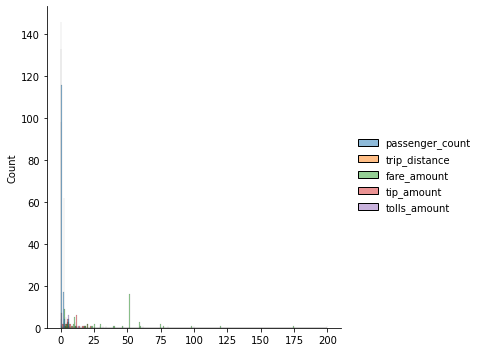

In [42]:
# trip_distance가 0인 값 확인
sns.displot(df[df['trip_distance'] == 0])

In [43]:
ex = df[df['trip_distance'] == 0]

In [44]:
ex

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1.0,0.0,20.0,0.00,0.0
248,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1.0,0.0,2.5,0.00,0.0
293,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1.0,0.0,2.5,0.00,0.0
321,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1.0,0.0,2.5,0.00,0.0
426,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1.0,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...
22192,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1.0,0.0,2.5,0.00,0.0
22327,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1.0,0.0,16.8,3.42,0.0
22385,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1.0,0.0,10.0,0.00,0.0
22568,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1.0,0.0,0.0,0.00,0.0


<AxesSubplot:xlabel='fare_amount', ylabel='tip_amount'>

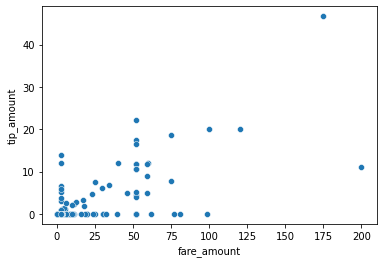

In [45]:
sns.scatterplot(x=ex['fare_amount'], y=ex['tip_amount'])

* 산점도 확인 결과 trip_distance가 0인 값들 중 정상값들이 많은 것을 확인
* 택시를 탔는데 기본 요금만 내고 내린 경우가 있을 수 있을 것이고
* 기본 요금도 내지 않고 내린 경우가 있을 수 있음
* fare가 2.5인 값이 많은 것으로 보아, 2.5불이 택시의 기본요금인 것을 확인할 수 있음
* 2.5 미만인 값들은 이상치로 판단, 삭제하고
* 2.5 이상인 값들은 유의미한 데이터라고 판단하여 trip_distance 값을 median 값으로 치환

In [46]:
df = df[df['fare_amount'] >= 2.5]

In [47]:
df[(df['fare_amount'] == 0) & (df['tip_amount'] > 0)]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [48]:
df.loc[(df['trip_distance'] == 0) & (df['fare_amount'] > 2.5), 'trip_distance'] = df['trip_distance'].median()
df.loc[(df['trip_distance'] == 0) & (df['fare_amount'] > 2.5)]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [49]:
# tpep_pickup_datetime과 tpep_dropoff_datetime의 데이터타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22670 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22670 non-null  object 
 1   tpep_dropoff_datetime  22670 non-null  object 
 2   payment_method         22670 non-null  object 
 3   passenger_count        22670 non-null  float64
 4   trip_distance          22670 non-null  float64
 5   fare_amount            22670 non-null  float64
 6   tip_amount             22670 non-null  float64
 7   tolls_amount           22670 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.6+ MB


In [50]:
# tpep_pickup_datetime을 datetime 형식으로 변환
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

/tmp/ipykernel_55/2471407738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])


In [51]:
# tpep_dropoff_datetime을 datetime 형식으로 변환
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

/tmp/ipykernel_55/2671297445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [52]:
# 데이터타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22670 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22670 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22670 non-null  datetime64[ns]
 2   payment_method         22670 non-null  object        
 3   passenger_count        22670 non-null  float64       
 4   trip_distance          22670 non-null  float64       
 5   fare_amount            22670 non-null  float64       
 6   tip_amount             22670 non-null  float64       
 7   tolls_amount           22670 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 1.6+ MB


In [53]:
# pickup과 dropoff의 시간차를 driving_time 컬럼에 기재
df['driving_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

/tmp/ipykernel_55/1240679411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['driving_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']


In [54]:
# 상관관계 분석을 위해 driving_time의 초 합계를 driving_time 컬럼에 대입
df['driving_time'] = df['driving_time'].dt.seconds

/tmp/ipykernel_55/2540880218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['driving_time'] = df['driving_time'].dt.seconds


<AxesSubplot:>

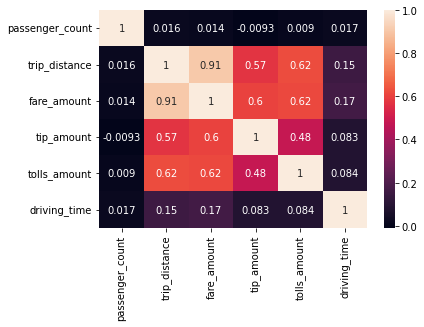

In [55]:
# 상관관계 분석 그래프
# 생각보다 driving time과 다른 feature값들의 상관관계가 높지 않음
# fare_amount와 trip_distance의 상관관계가 0.9로 높음
# PCA 시에 새로운 feature를 만들 수 있겠다는 생각
sns.heatmap(data = df.corr(), annot=True)

In [56]:
# payment_method 컬럼의 값 확인
df['payment_method']

0        Debit Card
1        Debit Card
2        Debit Card
3              Cash
4        Debit Card
            ...    
22696          Cash
22697          Cash
22698    Debit Card
22699    Debit Card
22700          Cash
Name: payment_method, Length: 22670, dtype: object

In [57]:
# payment_method의 debit card와 crredit card를 card로 변경
df['payment_method'] = df['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})

/tmp/ipykernel_55/3934445904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_method'] = df['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})


In [58]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,driving_time
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6.0,3.34,13.0,2.76,0.00,844
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1.0,1.80,16.0,4.00,0.00,1590
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1.0,1.00,6.5,1.45,0.00,432
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1.0,3.70,20.5,6.39,0.00,1815
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1.0,4.37,16.5,0.00,0.00,1003
...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3.0,0.61,4.0,0.00,0.00,196
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1.0,16.71,52.0,14.64,5.76,2448
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1.0,0.42,4.5,0.00,0.00,248
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1.0,2.36,10.5,1.70,0.00,716


In [59]:
# driving time과 total_amount 간에도 상관관계가 낮을지 확인하기 위해
# fare_amount, tip_amount, toll_amount의 합계를 total_amount로 할당
df['total_amount'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount']

/tmp/ipykernel_55/3060119098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount']


<AxesSubplot:>

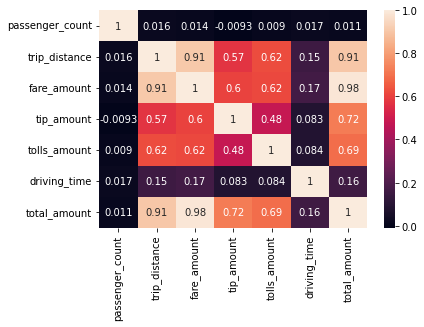

In [60]:
# total_amount와의 상관관계도 그리 높지 않은 것으로 확인
# 상식적으로 driving time과 total_amount는 상관관계가 높아야 한다고 생각되는데 왜 그러지 않는 건지 의문
sns.heatmap(data = df.corr(), annot=True)